<a href="https://colab.research.google.com/github/Priyesha710/summer-of-code-2024/blob/main/Week1/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Importing the libraries**

In [9]:
#importing libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#import sklearn
from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


##**Importing the data from google drive**

In [10]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
#Loading Dataset
df = pd.read_csv('/content/drive/MyDrive/Data/PS_20174392719_1491204439457_log.csv')

##**Cleaning the data of missing values, duplicate records, etc.**

In [17]:
#Check for missing values
print(df.isnull().sum())

#Drop rows with missing values and replace the original df with the modified df
df = df.dropna()

#Identify duplicates
print(df.duplicated().sum())

#Remove duplicates
df = df.drop_duplicates()
print(df.head())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64
0
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010    

##**Normalizing the data**


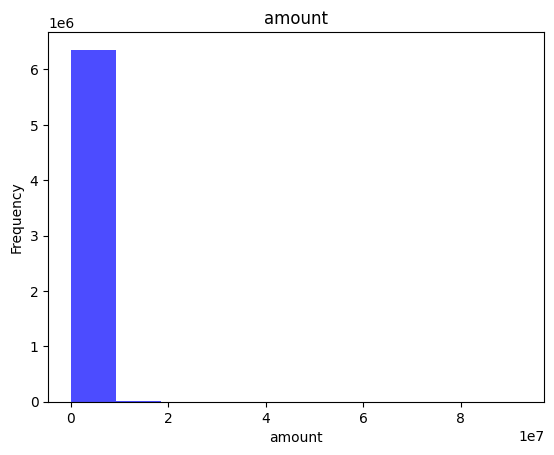

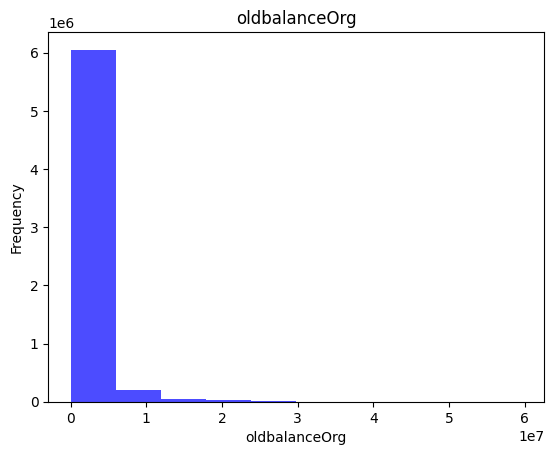

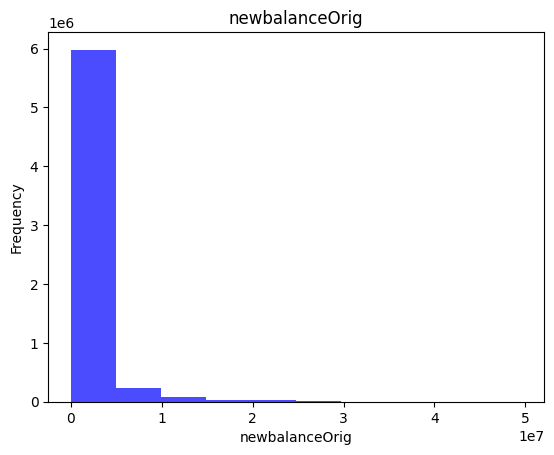

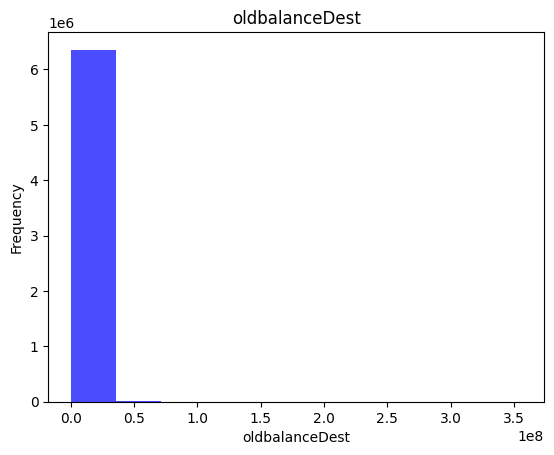

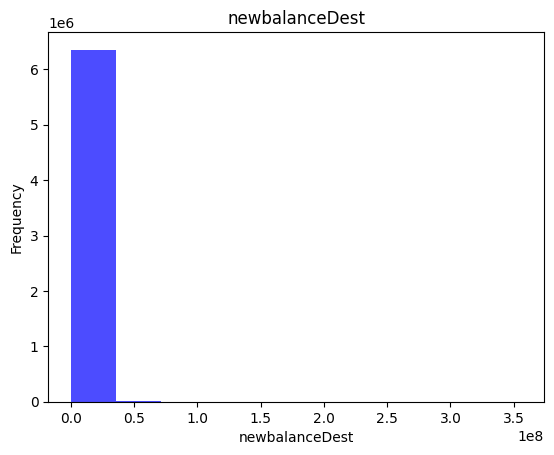

In [23]:
#Checking the distribution of required data


# Columns to normalize
cols_to_normalize = [2,4,5,7,8]

for i in cols_to_normalize:
  plt.hist(df.iloc[:,i], color = 'blue', alpha = 0.7)
  plt.title(df.columns[i])
  plt.ylabel("Frequency")
  plt.xlabel(df.columns[i])
  plt.show()

From the above histograms, we can see that the data mostly follows a power law distribution, where the frequency decreases exponentially as the value increases. In such cases, we can normalize the data by using log scaling method. In this method, x' = ln(x).


In [30]:
# Columns to normalize (adjust indices if needed)
cols_to_normalize = [2,4,5,7,8]

# Create a copy of the DataFrame to store normalized data
df2 = df.copy()

# Apply log scaling to specified columns
for col_index in cols_to_normalize:
    # Handle potential errors like log(0) or negative values
    col_name = df.columns[col_index]
    df2[col_name] = np.log1p(df[col_name]) # Use log1p to avoid log(0) error

df = df2
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,normalized_amount,normalized_oldbalanceOrg,normalized_newbalanceOrig,normalized_oldbalanceDest,normalized_newbalanceDest
0,1,PAYMENT,2.321826,C1231006815,2.568356,2.563778,M1979787155,0.000000,0.000000,0,0,-0.281560,-0.229810,-0.237622,-0.323814,-0.333411
1,1,PAYMENT,2.143726,C1666544295,2.394627,2.386218,M2044282225,0.000000,0.000000,0,0,-0.294767,-0.281359,-0.285812,-0.323814,-0.333411
2,1,TRANSFER,1.825195,C1305486145,1.825195,0.000000,C553264065,0.000000,0.000000,1,0,-0.297555,-0.288654,-0.292442,-0.323814,-0.333411
3,1,CASH_OUT,1.825195,C840083671,1.825195,0.000000,C38997010,2.394339,0.000000,1,0,-0.297555,-0.288654,-0.292442,-0.317582,-0.333411
4,1,PAYMENT,2.338406,C2048537720,2.453998,2.425261,M1230701703,0.000000,0.000000,0,0,-0.278532,-0.274329,-0.282221,-0.323814,-0.333411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,2.620003,C786484425,2.620003,0.000000,C776919290,0.000000,2.620003,1,0,0.264665,-0.171108,-0.292442,-0.323814,-0.240959
6362616,743,TRANSFER,2.812883,C1529008245,2.812883,0.000000,C1881841831,0.000000,0.000000,1,0,10.153953,1.896491,-0.292442,-0.323814,-0.333411
6362617,743,CASH_OUT,2.812883,C1162922333,2.812883,0.000000,C1365125890,2.496048,2.813530,1,0,10.153953,1.896491,-0.292442,-0.303665,1.403027
6362618,743,TRANSFER,2.684645,C1685995037,2.684645,0.000000,C2080388513,0.000000,0.000000,1,0,1.109765,0.005581,-0.292442,-0.323814,-0.333411


from matplotlib import pyplot as plt
df['step'].plot(kind='hist', bins=20, title='step')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['amount'].plot(kind='hist', bins=20, title='amount')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['oldbalanceOrg'].plot(kind='hist', bins=20, title='oldbalanceOrg')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['newbalanceOrig'].plot(kind='hist', bins=20, title='newbalanceOrig')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

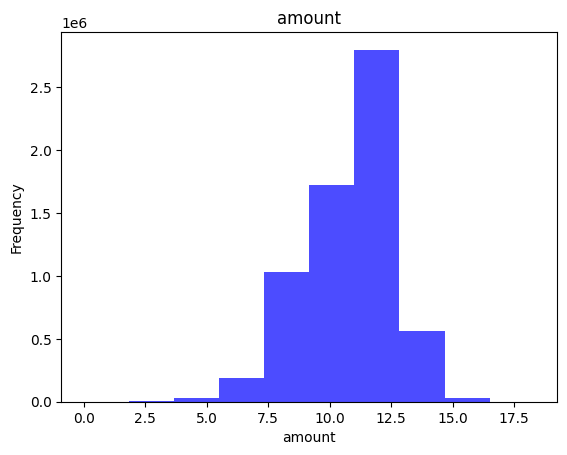

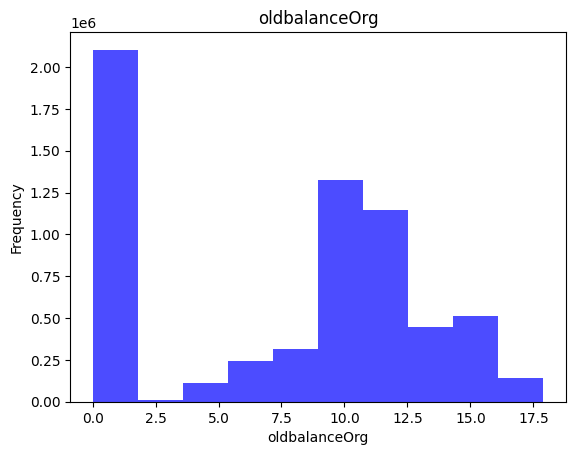

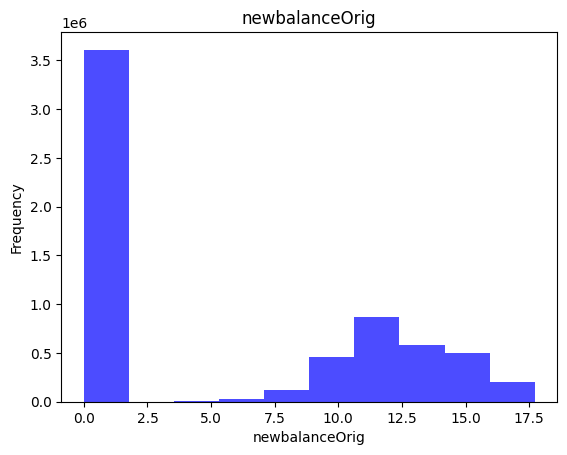

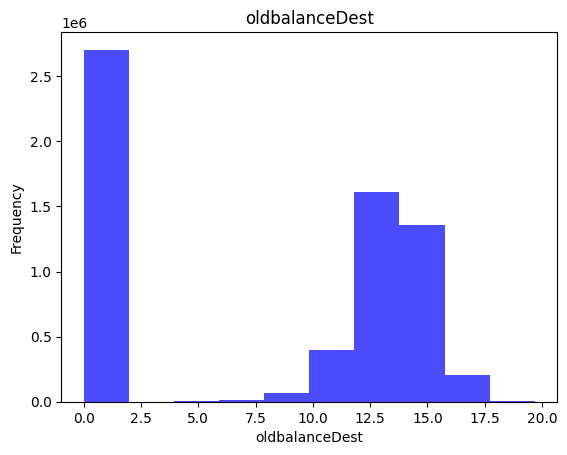

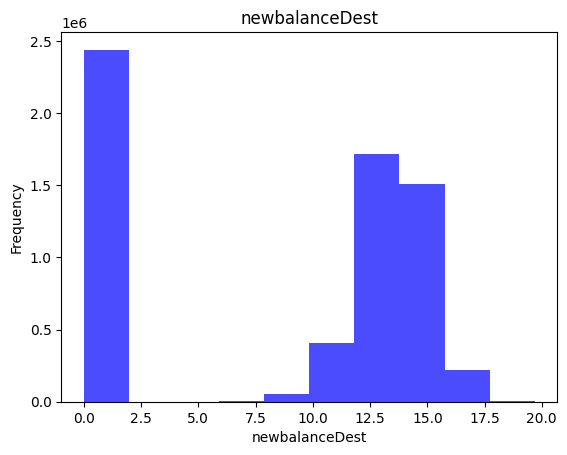

In [28]:
# Checking the normalized data
cols_to_normalize = [2,4,5,7,8]

for i in cols_to_normalize:
  plt.hist(df.iloc[:,i], color = 'blue', alpha = 0.7)
  plt.title(df.columns[i])
  plt.ylabel("Frequency")
  plt.xlabel(df.columns[i])
  plt.show()

We can see now that the data mostly confirms to a normal distribution, except for the sharp spike around 0, which seems to be an outlier. But since its frequency is very high, we cannot delete it, and must train the model in accordance.

##**Feature Engineering**

Now that we have the data, we check whether a given feature in the data has a relation to whether the transaction is fraudulent.

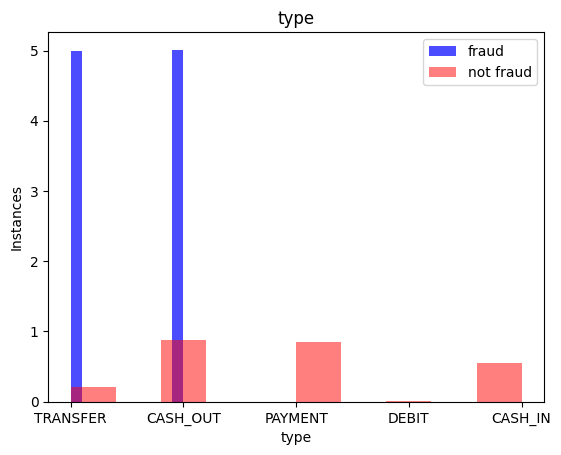

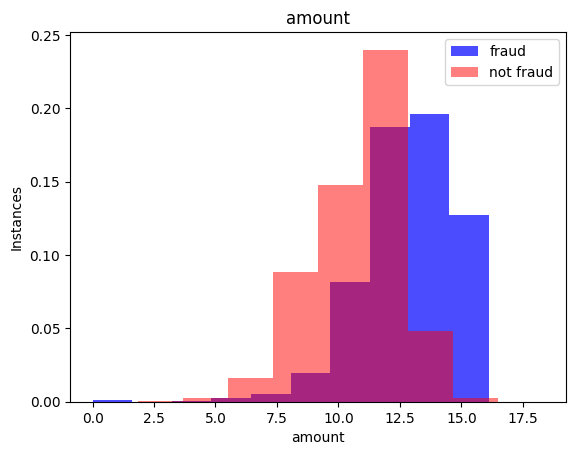

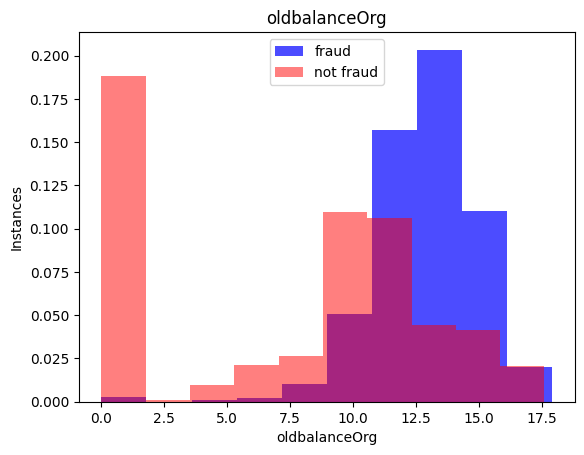

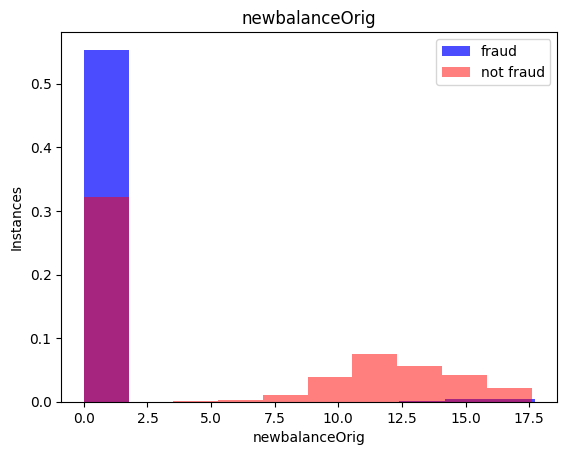

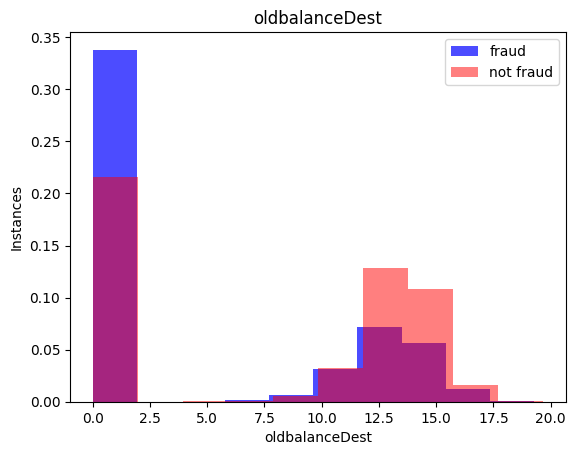

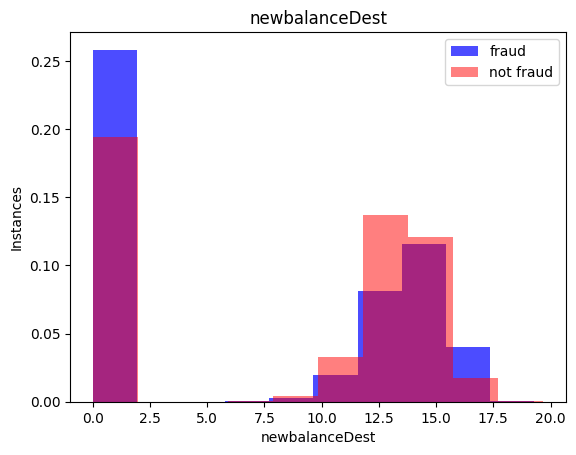

In [29]:
cols = [df.columns[1],df.columns[2],df.columns[4],df.columns[5],df.columns[7],df.columns[8]]
for label in cols:
  plt.hist(df[df["isFraud"]==1][label], color = 'blue', label = 'fraud',alpha = 0.7,density=True)
  plt.hist(df[df["isFraud"]==0][label], color = 'red', label = 'not fraud',alpha = 0.5,density=True)
  plt.title(label)
  plt.ylabel("Instances")
  plt.xlabel(label)
  plt.legend()
  plt.show()



##**Addressing class imbalance**



##**Implementation of classification algorithms**
We'll analyze the performance of the following classification algorithms:

1. Logistic Regression
2. Nearest Neighbours
3. Linear SVM
4. Random Forest
5. Gaussian Process
6. Decision Tree

First we'll get the truth table from each of these algorithms at various thresholds.

##**Evaluating various models for the given data.**
We'll use the ROC-AUC score to determine which model works best for the given data.